In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: Prof Marcelino Andrade
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

Stocks=['BBAS3','LCAM3', 'TECN3','NATU4']
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

N_months=10
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

/home/mrclnndrd/.local/lib/python3.5/site-packages/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and no longer available.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


[*********************100%***********************]  4 of 4 downloaded

In [12]:
stocks_all.head()
stock=pd.concat([ stocks_all.Open[Stocks[0]], stocks_all.High[Stocks[0]], stocks_all.Low[Stocks[0]], stocks_all.Close[Stocks[0]], 
              stocks_all.Volume[Stocks[0]]] , axis=1)  
stock.columns=['Open','High','Low','Close','Volume']
stock.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-07-16,31.080000,31.370001,30.450001,30.790001,8889800
2018-07-17,30.629999,32.099998,30.570000,31.820000,11575800
2018-07-18,31.799999,32.230000,31.389999,31.620001,12842500
2018-07-19,31.170000,31.340000,30.370001,31.340000,27335300
2018-07-20,32.500000,33.330002,32.070000,33.000000,19568500
2018-07-23,33.000000,33.200001,32.630001,32.779999,5622900
2018-07-24,33.200001,33.419998,32.880001,33.040001,6468000
2018-07-25,33.139999,33.740002,33.139999,33.570000,8337600
2018-07-26,33.540001,33.669998,32.410000,32.480000,7621400


<IPython.core.display.Javascript object>


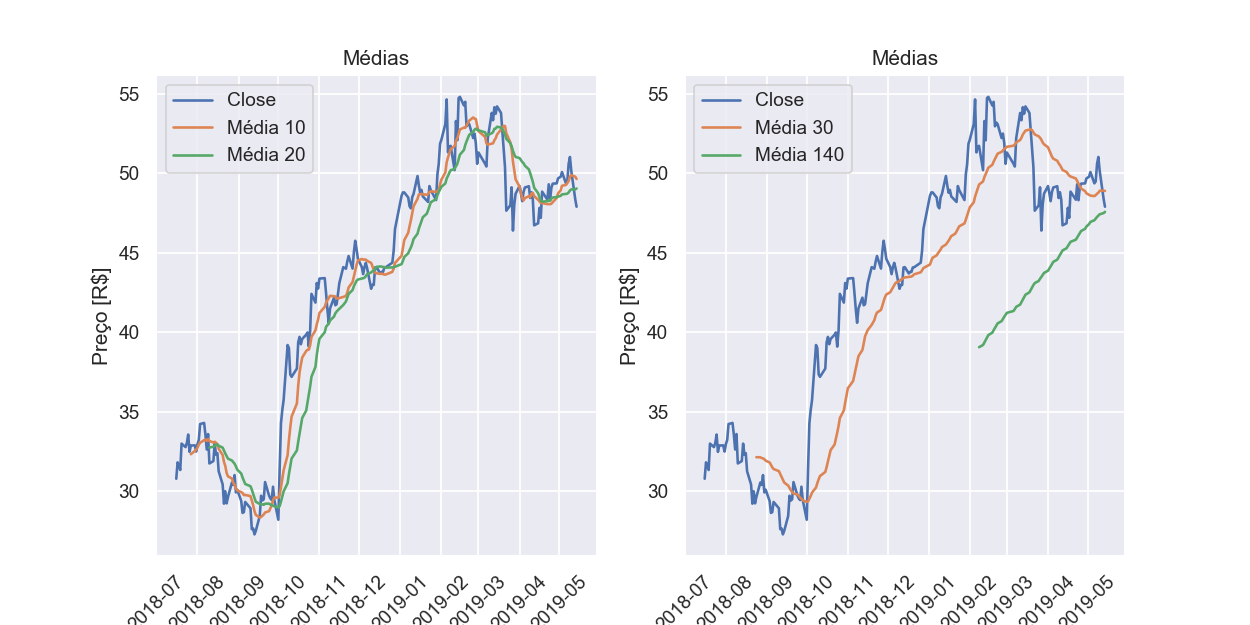

In [13]:
%matplotlib notebook 
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))

stock['10'] = stock['Close'].rolling(window=10).mean()
stock['20'] = stock['Close'].rolling(window=20).mean()
stock['30'] = stock['Close'].rolling(window=30).mean()
stock['140'] = stock['Close'].rolling(window=140).mean()

ax[0].plot(stock['Close'], label='Close')
ax[0].plot(stock['10'], label='Média 10')
ax[0].plot(stock['20'],label='Média 20')
ax[1].plot(stock['Close'], label='Close')
ax[1].plot(stock['30'], label='Média 30')
ax[1].plot(stock['140'],label='Média 140')
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)

ax[0].set_ylabel("Preço [R$]")
ax[0].set_xlabel("Data")
ax[0].set_title("Médias")
ax[0].legend(loc='upper left')
ax[1].set_ylabel("Preço [R$]")
ax[1].set_xlabel("Data")
ax[1].set_title("Médias")
ax[1].legend(loc='upper left')

# Show plot


In [14]:

short_window = 10
long_window = 21

# Inicia sinal DataFrame
signals = pd.DataFrame(index=stock.index)

signals['signal'] = 0.0

# Média Rápida
signals['short_mavg'] = stock['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Média Longa
signals['long_mavg'] = stock['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Sinal de Entrada
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   



<IPython.core.display.Javascript object>


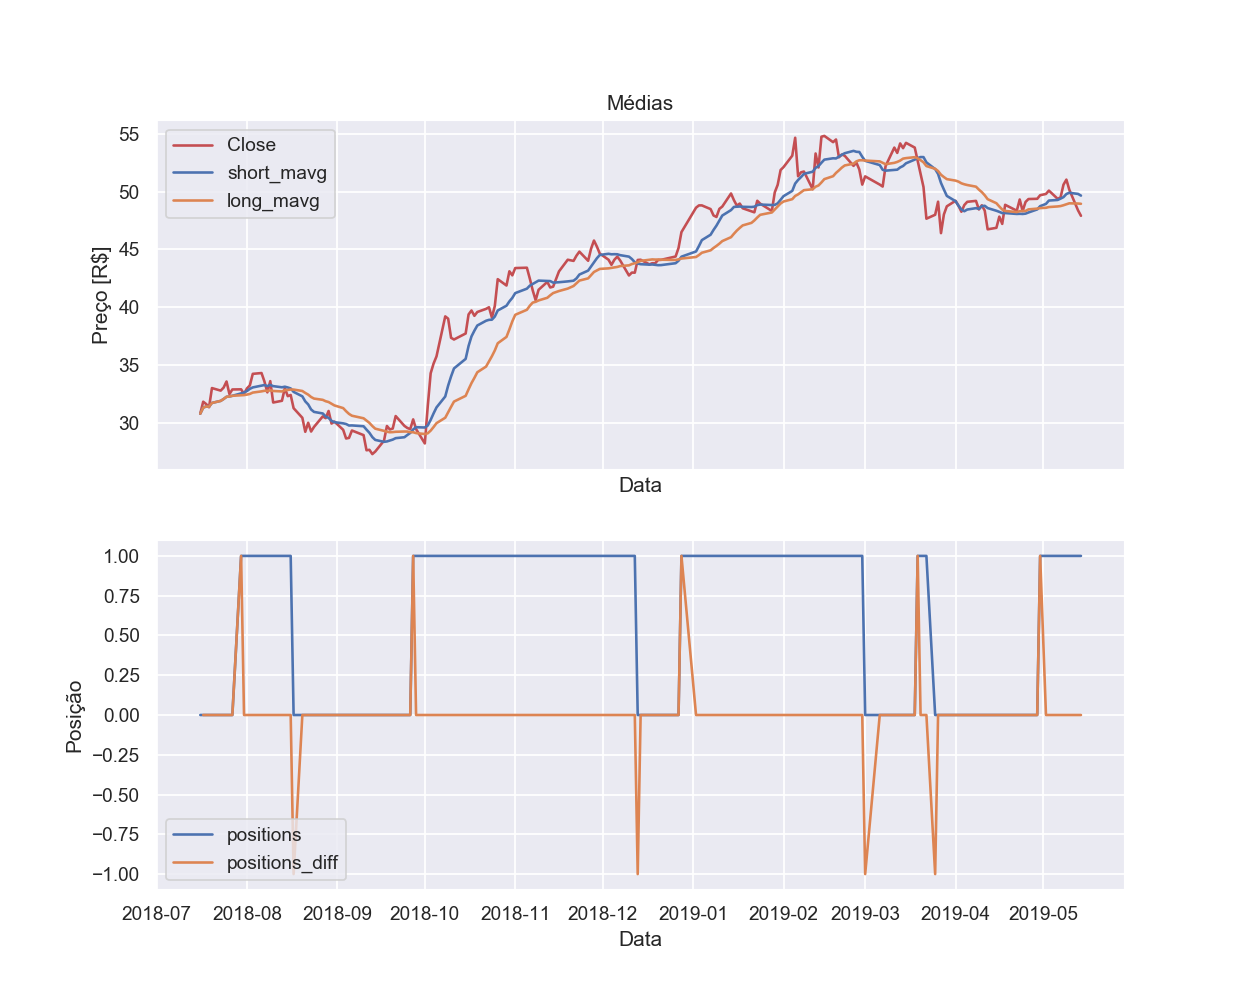

In [15]:
%matplotlib notebook 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))


short_window = 10
long_window = 21

# Inicia sinal DataFrame
signals = pd.DataFrame(index=stock.index)

signals['signal'] = 0.0

# Média Rápida
signals['short_mavg'] = stock['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Média Longa
signals['long_mavg'] = stock['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Sinal de Entrada
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   
# Posição dos trades
signals['positions'] = signals['signal']
signals['positions_diff'] = signals['signal'].diff()

ax[0].plot(stock['Close'], label='Close',color='r')
ax[0].plot(signals['short_mavg'], label='short_mavg')
ax[0].plot(signals['long_mavg'], label='long_mavg')
ax[0].set_ylabel("Preço [R$]")
ax[0].set_xlabel("Data")
ax[0].set_title("Médias")
ax[0].legend(loc='upper left')

ax[1].plot(signals['positions'], label='positions')
ax[1].plot(signals['positions_diff'], label='positions_diff')
ax[1].set_ylabel("Posição")
ax[1].set_xlabel("Data")
ax[1].legend(loc='lower left')


<IPython.core.display.Javascript object>


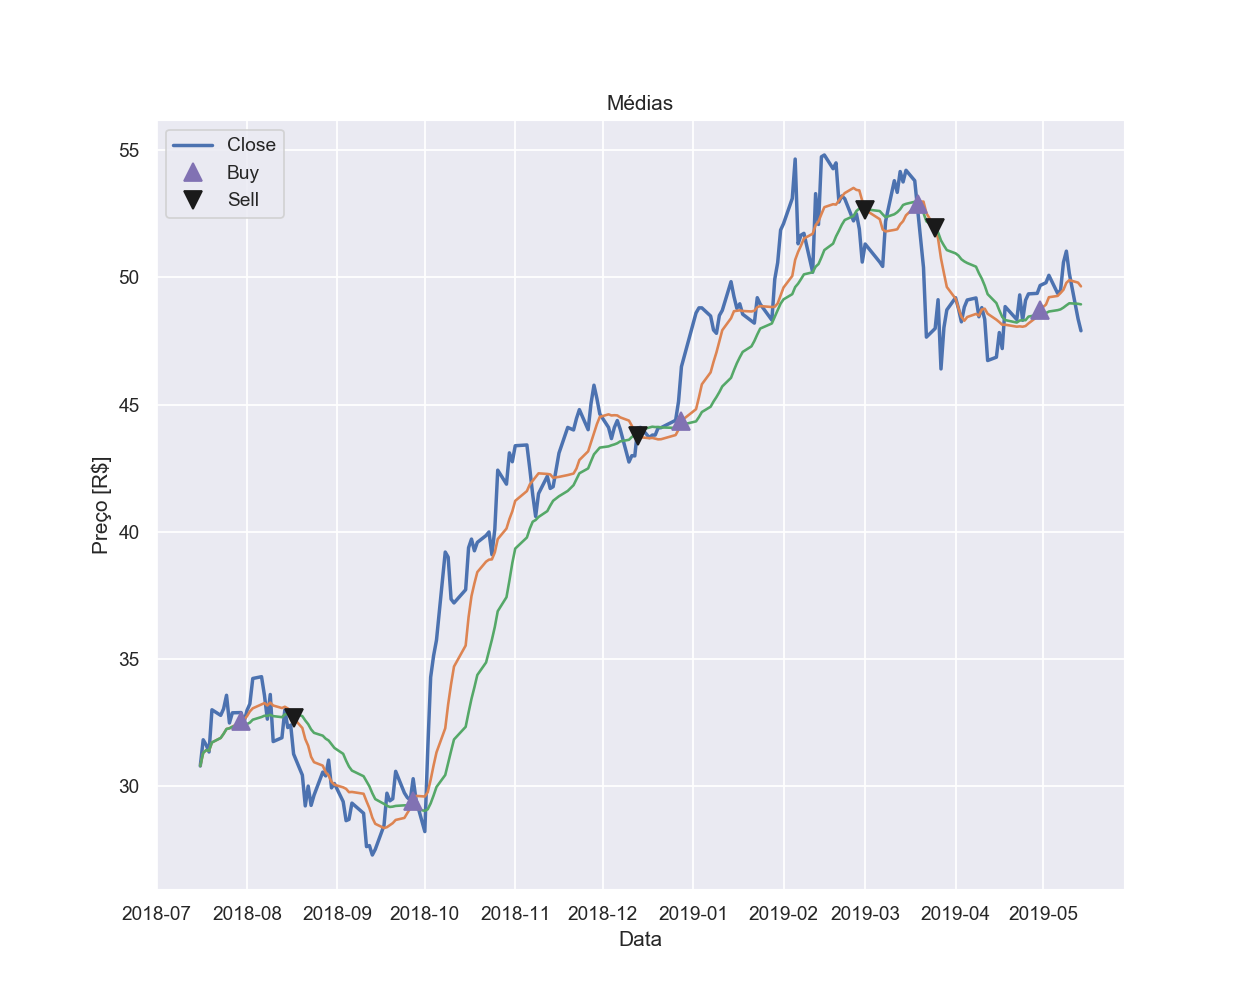

In [17]:
%matplotlib notebook 

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,8))

# Close
ax1.plot(stock['Close'], lw=2.,label='Close')

# Médias
ax1.plot(signals[['short_mavg', 'long_mavg']])

# Compra
ax1.plot(signals.loc[signals.positions_diff == 1.0].index, 
         signals.short_mavg[signals.positions_diff == 1.0],
         '^', markersize=10, color='m',label='Buy')
         
# venda
ax1.plot(signals.loc[signals.positions_diff == -1.0].index, 
         signals.short_mavg[signals.positions_diff == -1.0],
         'v', markersize=10, color='k',label='Sell')
     

ax1.set_ylabel("Preço [R$]")
ax1.set_xlabel("Data")
ax1.set_title("Médias")
ax1.legend(loc='upper left')


# Show the plot
plt.show()

<IPython.core.display.Javascript object>


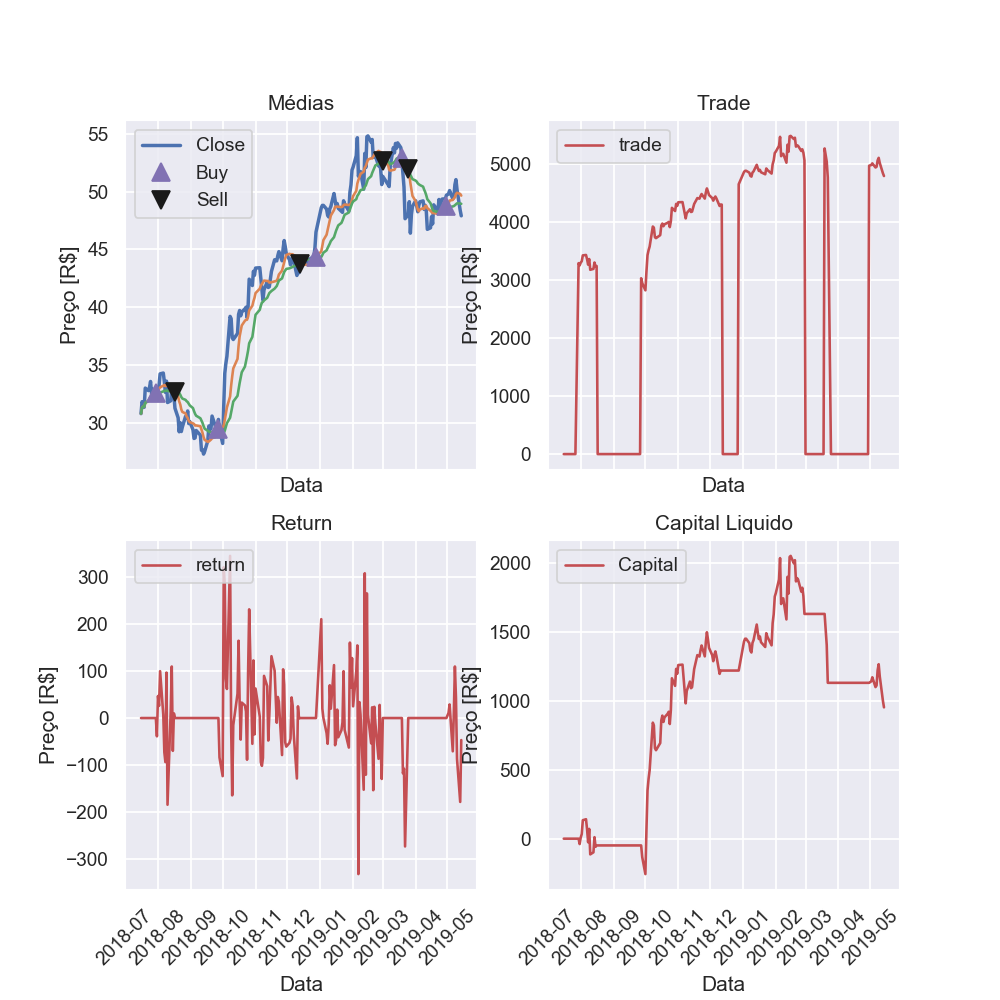

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8,8))
# Close
ax[0,0].plot(stock['Close'], lw=2.,label='Close')

# Médias
ax[0,0].plot(signals[['short_mavg', 'long_mavg']])

# Compra
ax[0,0].plot(signals.loc[signals.positions_diff == 1.0].index, 
         signals.short_mavg[signals.positions_diff == 1.0],
             
         '^', markersize=10, color='m',label='Buy')
         
# venda
ax[0,0].plot(signals.loc[signals.positions_diff == -1.0].index, 
         signals.short_mavg[signals.positions_diff == -1.0],
         'v', markersize=10, color='k',label='Sell')
   

ax[0,0].set_ylabel("Preço [R$]")
ax[0,0].set_xlabel("Data")
ax[0,0].set_title("Médias")
ax[0,0].legend(loc='upper left')


# Valor da ação
initial_capital= 100*float(stock['Close'][0])

# DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)
# Comprar a 100 ações

positions['AAA'] = 100*signals['signal']   

# Periodo de trades

signals['holdings'] = positions.multiply(stock['Close'], axis=0)
ax[0,1].plot(signals['holdings'], label='trade',color='r')

ax[0,1].set_ylabel("Preço [R$]")
ax[0,1].set_xlabel("Data")
ax[0,1].set_title("Trade")
ax[0,1].legend(loc='upper left')


# Retornos
signals['return'] = signals['holdings'].diff().fillna(0)
signals['return'][np.where(positions.diff()<0)[0]]=0
signals['return'][np.where(positions.diff()>0)[0]]=0
signals['return']=signals['return'].replace(np.inf,0)
ax[1,0].plot(signals['return'], label='return',color='r')
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(45)
    
ax[1,0].set_ylabel("Preço [R$]")
ax[1,0].set_xlabel("Data")
ax[1,0].set_title("Return")
ax[1,0].legend(loc='upper left')    
    
    
#capital
signals['capital']=signals['return'].cumsum()
ax[1,1].plot(signals['capital'], label='Capital',color='r')
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(45)

ax[1,1].set_ylabel("Preço [R$]")
ax[1,1].set_xlabel("Data")
ax[1,1].set_title("Capital Liquido")
ax[1,1].legend(loc='upper left')      
    

In [59]:
signals['capital'][-1]
["Capital Inicia = "+str(round(100*stock['Close'][0],2)), 
 "Ganho de Capital = "+str(round(signals['capital'][-1],2)), 
 "Percentual de Ganho = "+str(round(100*signals['capital'][-1]/(100*stock['Close'][0]),2))+"%"]

['Capital Inicia = 3079.0',
 'Ganho de Capital = 953.0',
 'Percentual de Ganho = 30.95%']

In [60]:
stock['Close']
valor1=stock['Close'].loc[signals['capital'][np.where(positions.diff()>0)[0]].index[0]]
valor2=stock['Close'].loc[signals['capital'][np.where(positions.diff()>0)[1]].index[0]]
Valores=[valor1,valor2]

In [ ]:
Gains